In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


Solution to the advection equation
$G(x,t,\xi,\tau)$

<IPython.core.display.Javascript object>


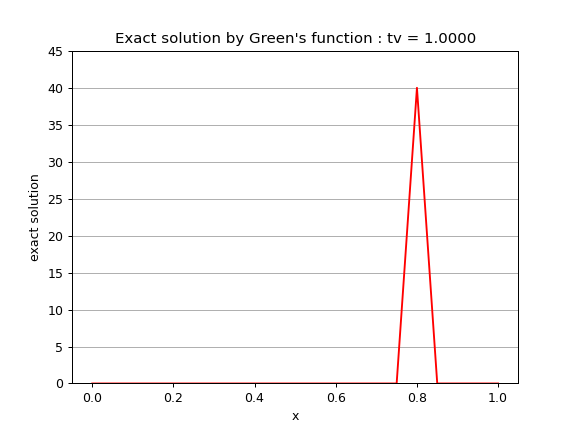

In [5]:
from scipy.special import erf
epsilon=0.05
def Hatfunct(x):
    return np.where(abs(x)<=(epsilon/2),(2/epsilon)*(1-abs((2*x))/epsilon),0)
def heaviside_hat(x):
    condition1 = x < -10e-5/2
    condition2 = np.logical_and(-10e-5/2 <= x, x < 0)
    condition3 = np.logical_and(0 <= x, x < 10e-5/2 )
    condition4 = x > 10e-5/2

    h = where(condition1, 0.0, 0.0)
    h = where(condition2, 1/2 + ((2/10e-5)*(x+(((x)**2)/10e-5))), h)
    h = where(condition3, 1/2 + ((2/10e-5)*(x-(((x)**2)/10e-5))), h)
    h = where(condition4, 1.0, h)
    return h
c=1
a=0
b=1
M = 20
dx=(b-a)/M
t0=0
T=1
t= linspace(t0,T,M+1)
x=linspace(a,b,M+1)
h= heaviside_hat(x)
def Gfunct(x,t,si,tau):
    return Hatfunct(x-si-c*(t-tau))*heaviside_hat(t-tau)
si = 0.3
tau=0.1
Qhat = zeros((len(t),len(x)))
for n in range(len(t)):
    for j in range(len(x)):
        Qhat[n,j] = Gfunct(t[n],x[j],si,tau)
fig = figure(1)
clf()
hdl, = plot(x,Qhat[0],'r')
tv = t[0]
tstr = 'Exact solution by Green\'s function : tv = {:.4f}'.format
htitle = title(tstr(0))
xlabel('x')
ylabel('exact solution')
htitle.set_text(tstr(tv))
grid(axis='y')
for m in range(len(t)):
    hdl.set_ydata(Qhat[m])
    ylim([0,45])
    tv = t[m]
    htitle.set_text(tstr(tv))
    fig.canvas.draw()   
    pause(0.2) 
show()